# descriptive.ipynb

This notebook calculated descriptive statistics in detail. The main notebook reports just a summary.

The `display_summary_table` and `plot_descriptive` functions below are called from the main notebook.

<br>
<br>

In [65]:
from IPython.display import display,Markdown #,HTML
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns


def display_title(s, pref='Figure', num=1, center=False):
    ctag = 'center' if center else 'p'
    s    = f'<{ctag}><span style="font-size: 1.2em;"><b>{pref} {num}</b>: {s}</span></{ctag}>'
    if pref=='Figure':
        s = f'{s}<br><br>'
    else:
        s = f'<br><br>{s}'
    display( Markdown(s) )



Below the previously developed `parse_data.ipynb` notebook is run. See that notebook for details.

In [66]:
%run parse_data.ipynb

df.describe()


,value,value_per_100k,year,pollution_avg,pollution_pop_avg,population,affected_pop,area_km2
count,7.834600e+04,78346.000000,78346.0,78346.000000,78346.000000,7.834600e+04,7.834600e+04,7.834600e+04
mean,1.026023e+03,64.465895,2022.0,264.184692,236.566906,2.047130e+06,1.445786e+06,9.008954e+03
std,1.988445e+04,152.151076,0.0,1199.613225,1052.877229,2.061794e+07,1.509341e+07,9.049549e+04
min,0.000000e+00,0.000000,2022.0,0.100000,0.300000,1.782300e+04,2.674000e+03,2.000000e+00
25%,7.000000e+00,3.000000,2022.0,7.400000,9.000000,1.654100e+05,1.107740e+05,5.714000e+02
50%,4.700000e+01,19.000000,2022.0,9.100000,11.500000,3.563360e+05,2.465810e+05,1.347600e+03
75%,2.330000e+02,64.000000,2022.0,12.400000,16.000000,9.651740e+05,6.251110e+05,4.303400e+03
max,2.643630e+06,3728.000000,2022.0,13840.400000,11702.400000,5.582807e+08,5.582716e+08,2.687568e+06


To create a custom display of descriptive statistics, let's first define functions that will calculate central tendency and dispersion metrics.

Refer also to [this notebook](https://github.com/0todd0000/OpenBook-DataAnalysisPracticeInPythonAndJupyter/blob/master/Lessons/Lesson04/5-Examples/DescriptiveStatsExamples.ipynb) for details regarding how create custom descriptive statistics tables.

In [67]:
def central(x, print_output=True):
    x0     = np.mean( x )
    x1     = np.median( x )
    x2     = stats.mode( x ).mode
    return x0, x1, x2


def dispersion(x, print_output=True):
    y0 = np.std( x ) # standard deviation
    y1 = np.min( x )  # minimum
    y2 = np.max( x )  # maximum
    y3 = y2 - y1      # range
    y4 = np.percentile( x, 25 ) # 25th percentile (i.e., lower quartile)
    y5 = np.percentile( x, 75 ) # 75th percentile (i.e., upper quartile)
    y6 = y5 - y4 # inter-quartile range
    return y0,y1,y2,y3,y4,y5,y6

<br>

Let's now assemble and display a central tendency table:

</br>

In [68]:
def display_central_tendency_table(num=1):
    display_title('Central tendency summary statistics.', pref='Table', num=num, center=False)

    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    df_central = numeric_df.apply(lambda x: central(x), axis=0)

    round_dict = {
        'value': 2,
        'value_per_100k': 2,
        'year': 0,
        'pollution_avg': 2,
        'pollution_pop_avg': 2,
        'population': 0,
        'affected_pop': 0,
        'area_km2': 2
    }

    for col, r in round_dict.items():
        if col in df_central.columns:
            df_central[col] = df_central[col].round(r)

    df_central.index = ['mean', 'median', 'mode']

    display(df_central)

# Run the function
display_central_tendency_table(num=1)


<br><br><p><span style="font-size: 1.2em;"><b>Table 1</b>: Central tendency summary statistics.</span></p>

,value,value_per_100k,year,pollution_avg,pollution_pop_avg,population,affected_pop,area_km2
mean,1026.02,64.47,2022.0,264.18,236.57,2047130.0,1445786.0,9008.95
median,47.00,19.00,2022.0,9.10,11.50,356336.0,246581.0,1347.60
mode,0.00,0.00,2022.0,8.50,8.70,33695.0,26115.0,2.00


<br>

Let's repeat for a dispersion table:

</br>

In [69]:
def display_dispersion_table(num=1):
    display_title('Dispersion summary statistics.', pref='Table', num=num, center=False)

    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    df_dispersion = numeric_df.apply(lambda x: dispersion(x), axis=0)

    round_dict = {
        'value': 2,
        'value_per_100k': 2,
        'year': 0,
        'pollution_avg': 2,
        'pollution_pop_avg': 2,
        'population': 0,
        'affected_pop': 0,
        'area_km2': 2
    }

    for col, r in round_dict.items():
        if col in df_dispersion.columns:
            df_dispersion[col] = df_dispersion[col].round(r)

    row_labels_dispersion = ['st.dev.', 'min', 'max', 'range', '25th', '75th', 'IQR']
    df_dispersion.index = row_labels_dispersion

    display(df_dispersion)

display_dispersion_table(num=2)



<br><br><p><span style="font-size: 1.2em;"><b>Table 2</b>: Dispersion summary statistics.</span></p>

,value,value_per_100k,year,pollution_avg,pollution_pop_avg,population,affected_pop,area_km2
st.dev.,19884.32,152.15,0.0,1199.61,1052.87,20617810.0,15093311.0,90494.91
min,0.00,0.00,2022.0,0.10,0.30,17823.0,2674.0,2.00
max,2643630.00,3728.00,2022.0,13840.40,11702.40,558280662.0,558271564.0,2687567.70
range,2643630.00,3728.00,0.0,13840.30,11702.10,558262839.0,558268890.0,2687565.70
25th,7.00,3.00,2022.0,7.40,9.00,165410.0,110774.0,571.40
75th,233.00,64.00,2022.0,12.40,16.00,965174.0,625111.0,4303.40
IQR,226.00,61.00,0.0,5.00,7.00,799764.0,514337.0,3732.00


Let's save the variables in easier-to-use variable names:

In [70]:
y = df['value']  

pollution = df['pollution_avg']
population = df['population']
affected = df['affected_pop']


Let's create scatterplots for the DV (quality) vs. each of the three IVs (acid, density, sugar):

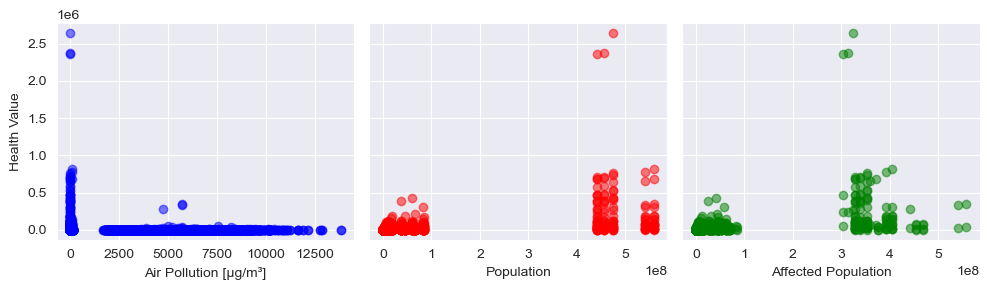

In [71]:
sns.set_style('darkgrid')
fig, axs = plt.subplots(1, 3, figsize=(10, 3), tight_layout=True)

axs[0].scatter(pollution, y, alpha=0.5, color='b')
axs[1].scatter(population, y, alpha=0.5, color='r')
axs[2].scatter(affected, y, alpha=0.5, color='g')

xlabels = ['Air Pollution [µg/m³]', 'Population', 'Affected Population']
[ax.set_xlabel(s) for ax, s in zip(axs, xlabels)]
axs[0].set_ylabel('Health Value')

[ax.set_yticklabels([]) for ax in axs[1:]]

plt.show()


The density xtick values are difficult to reach so let's make them easier to read:

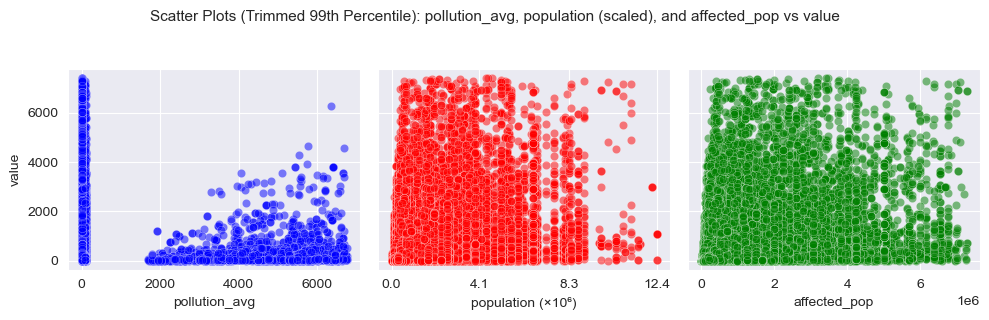

In [72]:
df_filt = df[
    (df['pollution_avg'] > 0) &
    (df['population'] > 0) &
    (df['affected_pop'] > 0) &
    (df['value'] > 0)
].copy()

for col in ['pollution_avg', 'population', 'affected_pop', 'value']:
    upper = np.percentile(df_filt[col], 99)
    df_filt = df_filt[df_filt[col] <= upper]

pollution_avg = df_filt['pollution_avg']
population = df_filt['population']
affected_pop = df_filt['affected_pop']
y = df_filt['value']

dens1 = np.around(population * 1e-6, 1)  # у мільйонах

sns.set_style('darkgrid')
fig, axs = plt.subplots(1, 3, figsize=(10, 3), tight_layout=True)

axs[0].scatter(pollution_avg, y, alpha=0.5, color='b', edgecolor='white', linewidth=0.3)
axs[1].scatter(dens1, y, alpha=0.5, color='r', edgecolor='white', linewidth=0.3)
axs[2].scatter(affected_pop, y, alpha=0.5, color='g', edgecolor='white', linewidth=0.3)

xlabels = ('pollution_avg', 'population (×10⁶)', 'affected_pop')
[ax.set_xlabel(s) for ax, s in zip(axs, xlabels)]

axs[1].set_xticks(np.linspace(dens1.min(), dens1.max(), 4).round(1))  # ручні xticks, як у прикладі
axs[0].set_ylabel('value')

[ax.set_yticklabels([]) for ax in axs[1:]]

fig.suptitle(
    'Scatter Plots (Trimmed 99th Percentile): pollution_avg, population (scaled), and affected_pop vs value',
    fontsize=11,
    y=1.05,
    ha='center'
)

plt.show()

Next let's add regression lines and correlation coefficients to each plot:

In [73]:
def corrcoeff(x, y):
    r = np.corrcoef(x, y)[0,1]
    return r

def plot_regression_line(ax, x, y, **kwargs):
    a,b   = np.polyfit(x, y, deg=1)
    x0,x1 = min(x), max(x)
    y0,y1 = a*x0 + b, a*x1 + b
    ax.plot([x0,x1], [y0,y1], **kwargs)


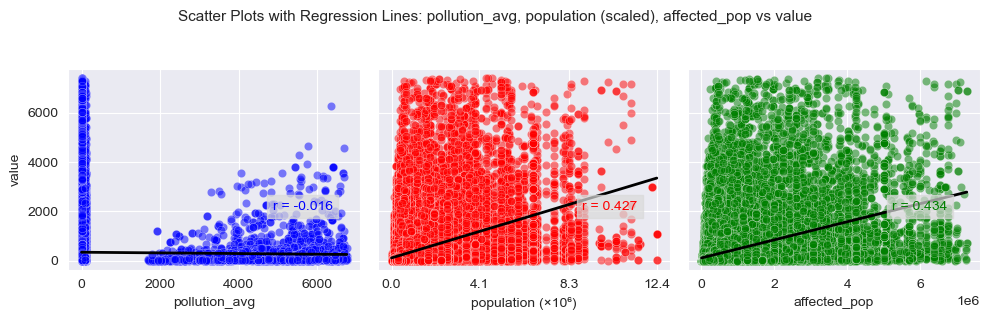

In [74]:
    
sns.set_style('darkgrid')
fig, axs = plt.subplots(1, 3, figsize=(10, 3), tight_layout=True)

ivs = [pollution_avg, dens1, affected_pop]
colors = ['b', 'r', 'g']

for ax, x, c in zip(axs, ivs, colors):
    ax.scatter(x, y, alpha=0.5, color=c, edgecolor='white', linewidth=0.3)
    plot_regression_line(ax, x, y, color='k', ls='-', lw=2)
    r = corrcoeff(x, y)
    ax.text(
        0.7, 0.3, f'r = {r:.3f}', color=c,
        transform=ax.transAxes,
        bbox=dict(color='0.85', alpha=0.7)
    )

xlabels = ('pollution_avg', 'population (×10⁶)', 'affected_pop')
[ax.set_xlabel(s) for ax, s in zip(axs, xlabels)]

axs[1].set_xticks(np.linspace(dens1.min(), dens1.max(), 4).round(1))
axs[0].set_ylabel('value')

[ax.set_yticklabels([]) for ax in axs[1:]]

fig.suptitle(
    'Scatter Plots with Regression Lines: pollution_avg, population (scaled), affected_pop vs value',
    fontsize=11, y=1.05, ha='center'
)

plt.show()

However, population and affected population (middle and right panels) show slightly higher positive correlations, suggesting that areas with larger populations or more people affected tend to exhibit higher overall health impact values.
To explore this further, we can analyze the pollution–health relationship separately across different health outcome categories (e.g., mortality vs. morbidity) and visualize their individual regression trends.

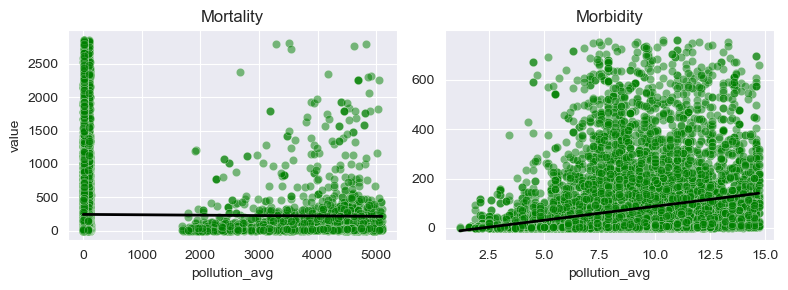

In [78]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), tight_layout=True)

categories = ['Mortality', 'Morbidity']

for ax, cat in zip(axs, categories):

    data = df[
        (df['category'] == cat) &
        (df['pollution_avg'] > 0) &
        (df['value'] > 0)
    ].copy()

    upper_val = data['value'].quantile(0.95)
    upper_pol = data['pollution_avg'].quantile(0.95)
    data = data[
        (data['value'] <= upper_val) &
        (data['pollution_avg'] <= upper_pol)
    ]

    ax.scatter(
        data['pollution_avg'], data['value'],
        alpha=0.5, color='g', edgecolor='white', linewidth=0.3
    )

    plot_regression_line(
        ax,
        data['pollution_avg'],
        data['value'],
        color='k', ls='-', lw=2
    )

    ax.set_title(cat)
    ax.set_xlabel('pollution_avg')

axs[0].set_ylabel('value')
plt.show()


The linear trend lines in the figures above do not fully match the visual patterns:

- Mortality shows little to no visible increase with pollution, despite a slight positive regression line.
- Morbidity appears to rise more sharply at moderate pollution levels, but the overall regression slope remains modest.

This suggests that the simple linear fit may not capture the true variation within each category. To explore this further, we can highlight the average health impact (value) across pollution levels for each outcome group.

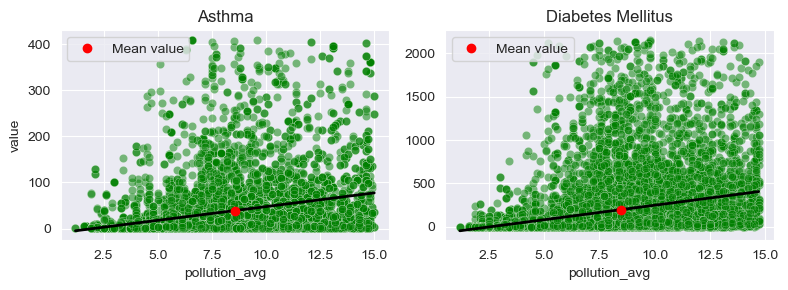

In [83]:
outcome_1 = 'Asthma'
outcome_2 = 'Diabetes Mellitus'

fig, axs = plt.subplots(1, 2, figsize=(8, 3), tight_layout=True)

for ax, outcome, title in zip(
    axs,
    [outcome_1, outcome_2],
    [outcome_1, outcome_2]
):

    data = df[
        (df['outcome'] == outcome) &
        (df['pollution_avg'] > 0) &
        (df['value'] > 0)
    ].copy()

    if data.empty:
        ax.text(0.5, 0.5, f'No data for {outcome}',
                ha='center', va='center', color='red')
        ax.set_title(title)
        continue

    pol_95 = data['pollution_avg'].quantile(0.95)
    val_95 = data['value'].quantile(0.95)

    data = data[
        (data['pollution_avg'] <= pol_95) &
        (data['value'] <= val_95)
    ]

    if len(data) < 2:
        ax.text(0.5, 0.5, f'Not enough data for regression',
                ha='center', va='center', color='red')
        ax.set_title(title)
        continue

    ax.scatter(
        data['pollution_avg'], data['value'],
        alpha=0.5, color='g', edgecolor='white', linewidth=0.3
    )

    plot_regression_line(
        ax,
        data['pollution_avg'],
        data['value'],
        color='k', ls='-', lw=2
    )

    ax.plot(
        data['pollution_avg'].mean(),
        data['value'].mean(),
        'ro',
        label='Mean value'
    )

    ax.set_title(title)
    ax.set_xlabel('pollution_avg')
    ax.legend()

axs[0].set_ylabel('value')
plt.show()


Let's now assemble all results into a single figure for reporting purposes:

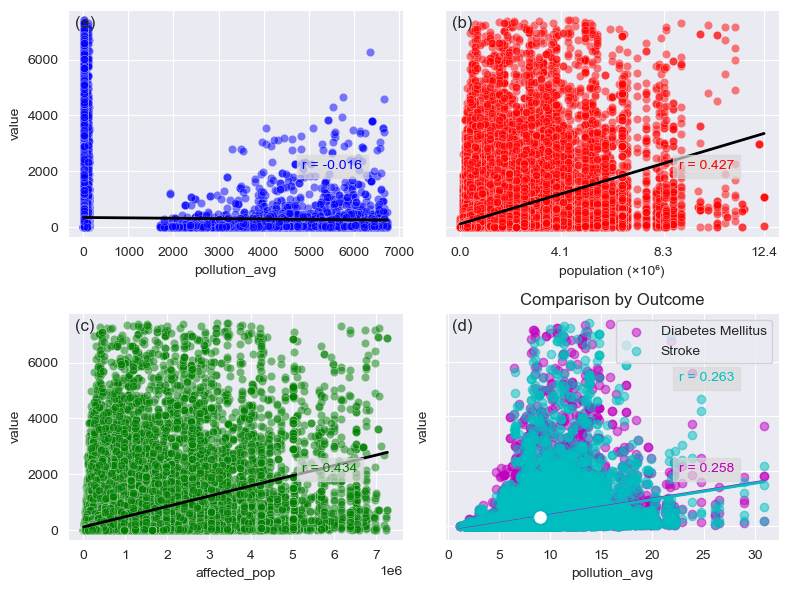

<p><span style="font-size: 1.2em;"><b>Figure 1</b>: Correlations among key variables and outcomes.</span></p><br><br>

In [82]:
def plot_descriptive():

    df_f = df[
        (df['pollution_avg'] > 0) &
        (df['population'] > 0) &
        (df['affected_pop'] > 0) &
        (df['value'] > 0)
    ].copy()

    for col in ['pollution_avg', 'population', 'affected_pop', 'value']:
        upper = df_f[col].quantile(0.99)
        df_f = df_f[df_f[col] <= upper]

    X1 = df_f['pollution_avg']
    X2 = np.around(df_f['population'] * 1e-6, 1)   
    X3 = df_f['affected_pop']
    Y  = df_f['value']

    ivs     = [X1, X2, X3]
    colors  = ('b', 'r', 'g')
    xlabels = ('pollution_avg', 'population (×10⁶)', 'affected_pop')

    fig, axs = plt.subplots(2, 2, figsize=(8, 6), tight_layout=True)

    # Панелі (a), (b), (c)
    for ax, x, c, lab in zip(axs.ravel()[:3], ivs, colors, xlabels):
        ax.scatter(x, Y, alpha=0.5, color=c, edgecolor='white', linewidth=0.3)
        plot_regression_line(ax, x, Y, color='k', ls='-', lw=2)

        r = corrcoeff(x, Y)
        ax.text(0.7, 0.3, f'r = {r:.3f}', color=c,
                transform=ax.transAxes, bbox=dict(color='0.85', alpha=0.7))

        ax.set_xlabel(lab)

    [ax.set_ylabel('value') for ax in axs[:, 0]]
    [ax.set_yticklabels([]) for ax in axs[:, 1]]

    axs[0, 1].set_xticks(np.linspace(X2.min(), X2.max(), 4).round(1))

    ax = axs[1, 1]

    top2 = df_f['outcome'].value_counts().index[:2].tolist()

    outcome_1, outcome_2 = top2[0], top2[1]

    masks   = [df_f['outcome'] == outcome_1,
               df_f['outcome'] == outcome_2]
    fcolors = ('m', 'c')
    labels  = (outcome_1, outcome_2)
    ylocs   = (0.3, 0.7)

    for mask, col, label, yloc in zip(masks, fcolors, labels, ylocs):
        data = df_f[mask]
        x = data['pollution_avg']
        y = data['value']

        ax.scatter(x, y, alpha=0.5, color=col, label=label)
        plot_regression_line(ax, x, y, color=col, ls='-', lw=2)

        # Mean marker
        ax.plot(x.mean(), y.mean(), 'o', color=col, mfc='w', ms=10)

        r = corrcoeff(x, y)
        ax.text(0.7, yloc, f'r = {r:.3f}', color=col,
                transform=ax.transAxes, bbox=dict(color='0.85', alpha=0.7))

    ax.legend()
    ax.set_title('Comparison by Outcome')
    ax.set_xlabel('pollution_avg')
    ax.set_ylabel('value')

    for ax, lab in zip(axs.ravel(), ('a', 'b', 'c', 'd')):
        ax.text(0.02, 0.92, f'({lab})', size=12, transform=ax.transAxes)

    plt.show()

    try:
        display_title('Correlations among key variables and outcomes.', pref='Figure', num=1)
    except:
        pass


plot_descriptive()
